<a href="https://colab.research.google.com/github/poojak-shetty/Online_news_popularity/blob/master/Neural_Networks_and_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING NECESSARY LIBRARIES**

In [0]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from tqdm import tqdm_notebook
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import seaborn as sns

In [0]:
df=pd.read_csv("Cleaned dataset1.csv")

In [46]:
df

,Unnamed: 0,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,0
1,1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,0
2,2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1
3,3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,0
4,4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,39639,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,4.523121,8.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,671.0,173.125,26900.0,843300.0,374962.500000,2514.742857,4004.342857,3031.115764,11400.0,48000.0,37033.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.025038,0.025001,0.151701,0.025000,0.773260,0.482679,0.141964,0.037572,0.014451,0.722222,0.277778,0.333791,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1
39640,39640,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,4.405488,7.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,616.0,184.000,6500.0,843300.0,192985.714286,1664.267857,5470.168651,3411.660830,2100.0,2100.0,2100.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.029349,0.028575,0.231866,0.681635,0.028575,0.564374,0.194249,0.039634,0.009146,0.

In this csv file we have one more column named 'Unnamed:0' which occurs because its the index column in the dataset which we have saved.So,we need to remove that column.



In [0]:
df=df.loc[:, ~df.columns.str.match('Unnamed')]

In [48]:
df

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,0
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,0
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,0
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,4.523121,8.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,671.0,173.125,26900.0,843300.0,374962.500000,2514.742857,4004.342857,3031.115764,11400.0,48000.0,37033.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.025038,0.025001,0.151701,0.025000,0.773260,0.482679,0.141964,0.037572,0.014451,0.722222,0.277778,0.333791,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1
39640,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,4.405488,7.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,616.0,184.000,6500.0,843300.0,192985.714286,1664.267857,5470.168651,3411.660830,2100.0,2100.0,2100.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.029349,0.028575,0.231866,0.681635,0.028575,0.564374,0.194249,0.039634,0.009146,0.812500,0.187500,0.374825,0.136364,0.7

# **NEURAL NETWORKS**

In [0]:
# All Activation Functions and their Transfer Derivatives

# 1. Sigmoid / Logistic Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def dsigmoid(x):
    return x * (1-x)

# 2. Rectified Linear Unit Function
def relu(x):
     return abs(x) * (x > 0)

def drelu(x):
     return 1. * (x > 0.)

# 3. Leaky-Relu Functions
def lrelu(x):
    return np.where(x > 0., x, x * 0.01)

def dlrelu(x):
    dx = np.ones_like(x)
    dx[x < 0.] = 0.01
    return dx

# 4. Hyperbolic Tan Function
def tanh(x):
    return np.tanh(x)

def dtanh(x):
    return 1.0 - (np.power(np.tanh(x),2))


**Here activation function used is sigmoid.**

**Sigmoid is used because it is a classification problem.**

Sigmoid is a mathematical function which categorises values greater than a threshold value as 1 and others as 0.


**Feed forward** and **Backpropogate** are the 2 main functions of Neural Networks.

**Feed Forward function** sends data in forward direction through nodes.Nodes contribute to a layer. An input layer is which where input is taken, here in input layer there are features. From input layer data is sent into nodes of hidden layer through weights(w0,w1 etc). There can be multiple hidden layers.Here i have used only 1 hidden layer.From hidden layer data is sent to output nodes through weights.

Weights are randomly chosen at starting using random function in numpy.

**BackPropogate function** starts from output node and propogates backward towards input node and tries to reduce the error by adjusting the weights in each iteration.

In [0]:
def feed_forward(data_in, w0,w1):
    layer0 = data_in
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    return layer0, layer1, layer2

def backpropogate(layer0, layer1, layer2, actual_y, w0,w1, learning_rate):

    l2_error = layer2 - actual_y
    l2_delta = l2_error * dsigmoid(layer2)
    dh2 = layer1.T.dot(l2_delta)
    
    l1_error = l2_delta.dot(w1.T)
    l1_delta = l1_error * dsigmoid(layer1)
    dh1 = layer0.T.dot(l1_delta)
    
    w1 = w1 - (learning_rate * dh2)
    w0 = w0 - (learning_rate * dh1)     
    return w0, w1

def get_accuracy(X, Y):
  """
  returns accuracy after predicting using trained weights
  """
  layer0, layer1, y_pred = feed_forward(X, w0,w1)
  yp = np.argmax(y_pred,axis=1)
  yt = np.argmax(Y,axis=1)
  return accuracy_score(yt, yp) * 100

def get_model_description(weights):
  """
  Describes Hyperparameters at each layer.
  """

  total = 0
  
  print("Weight ip-op", "Layer Shape", "Layer Params", sep="\t")
  for i,l in enumerate(weights):
    params = l.shape[0]*l.shape[1]
    total += params
    print(f"Layer {i}-{i+1}", l.shape, params, sep="\t")
  
  print("\nTotal Trainable Params: ", total)


Accuracy function using accuracy score from sklearn library is used to calculate the prediction accuracy.



In [0]:
# Extract Features & Target
features = df.values[:,:58]
target = df[' shares'].values

In [24]:
features

array([[ 1.20000000e+01,  2.19000000e+02,  6.63594467e-01, ...,
        -1.87500000e-01,  0.00000000e+00,  1.87500000e-01],
       [ 9.00000000e+00,  2.55000000e+02,  6.04743081e-01, ...,
         0.00000000e+00,  5.00000000e-01,  0.00000000e+00],
       [ 9.00000000e+00,  2.11000000e+02,  5.75129531e-01, ...,
         0.00000000e+00,  5.00000000e-01,  0.00000000e+00],
       ...,
       [ 1.00000000e+01,  4.42000000e+02,  5.16355139e-01, ...,
         1.36363636e-01,  4.54545455e-02,  1.36363636e-01],
       [ 6.00000000e+00,  6.82000000e+02,  5.39493293e-01, ...,
         0.00000000e+00,  5.00000000e-01,  0.00000000e+00],
       [ 1.00000000e+01,  1.57000000e+02,  7.01986750e-01, ...,
         2.50000000e-01,  1.66666667e-01,  2.50000000e-01]])

In [25]:
target

array([0, 0, 1, ..., 1, 0, 0])

In [0]:
from sklearn.metrics import accuracy_score


In [28]:
df.iloc[:,:58].head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364


We have to understand that not all features contribute to classify news as popular and not popular.
Feature selection can be done on this basis as well.
Here for simplicity we have done PCA for feature reduction/selection in NEURAL NETWORKS.We did not use PCA for Logistic Regression because it made the accuracy worse.

**Principal component analysis (PCA) is a technique used for identification of a smaller number of uncorrelated variables known as principal components from a larger set of data. The technique is widely used to emphasize variation and capture strong patterns in a data set.**

In [0]:
# Feature Scaling using MinMaxScaler to Normalize all data points
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

# Convert Categorical Vector to One-Hot Encoded Matrix 
encoder = OneHotEncoder(handle_unknown='ignore')
one_hot_targets = encoder.fit_transform(target.reshape(-1,1)).toarray()

# Because the input feature matrix is very sparse
# we will use Dimensionality Reduction to reduce noise

# 0.95 denotes 95% Variance - 0.9 - 0.99 is a good score
pca = PCA(n_components=0.9) 
reduced_features = pca.fit_transform(features)

In [30]:
len(reduced_features[0])

18


Splitting dataset for training and testing using train_test_split() from sklearn library.

Model is trained on training dataset i.e here around 70% of dataset and model is tested after training on remaining 30% dataset i.e test dataset.

In [0]:
xtrain, xtest, ytrain, ytest = train_test_split(reduced_features, one_hot_targets, test_size = 0.3)


random.seed() is used to repropoduce same random value at each execution. If the argument number is changed different value will be produced while execution.



In [20]:
np.random.seed(0)

input_nodes = len(reduced_features[0])
#random value of weights are initialised at starting
# Define Weights
w0 = np.random.random((input_nodes,4))
w1 = np.random.random((4,2))

# Define Iterations
iterations = 15000

# Check Model Hyperparameter
get_model_description([w0,w1])

Weight ip-op	Layer Shape	Layer Params
Layer 0-1	(18, 4)	72
Layer 1-2	(4, 2)	8

Total Trainable Params:  80



**Training**

TQDM is a progress bar library.

Here the training of model is done on train dataset by invoking feedforward and backpropogate functions.Error and accuracy after every 1000 iterations get printed.

In [35]:
# Initialising variables to track loss vs iterations so we can plot the changes
train_loss = []
val_loss = []

train_acc = []
val_acc = []

iters = []
iters2 = []

for i in tqdm_notebook(range(iterations)):
  # Train the model
  layer0, layer1, layer2 = feed_forward(xtrain, w0,w1)
  w0,w1= backpropogate(layer0, layer1, layer2, ytrain, w0,w1, 0.001)

  # Print Loss, Accuracy & Collect values to plot later
  if i%10==0:
    _, _, vpred = feed_forward(xtest, w0,w1)
    tloss = np.mean(np.abs(layer2-ytrain))
    vloss = np.mean(np.abs(vpred-ytest))

    # Append for plotting
    train_loss.append(tloss)
    val_loss.append(vloss)
    iters.append(int(i))

    
    
    # Print Loss
    if i%1000 == 0:
      tacc = get_accuracy(xtrain, ytrain)
      vacc = get_accuracy(xtest, ytest)
      train_acc.append(tacc)
      val_acc.append(vacc)
      iters2.append(i)
      print("Train Loss: %.5f | Valdn Loss: %.5f | Train Acc. %.5f | Test  Acc. %.5f" %(tloss, vloss, tacc, vacc))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # Remove the CWD from sys.path while we load stuff.


Train Loss: 0.50113 | Valdn Loss: 0.50027 | Train Acc. 50.55495 | Test  Acc. 50.89121
Train Loss: 0.45148 | Valdn Loss: 0.45492 | Train Acc. 63.50991 | Test  Acc. 62.50210
Train Loss: 0.44982 | Valdn Loss: 0.45364 | Train Acc. 63.57838 | Test  Acc. 62.48529
Train Loss: 0.44926 | Valdn Loss: 0.45322 | Train Acc. 63.60000 | Test  Acc. 62.40962
Train Loss: 0.44895 | Valdn Loss: 0.45302 | Train Acc. 63.59640 | Test  Acc. 62.56936
Train Loss: 0.44848 | Valdn Loss: 0.45263 | Train Acc. 63.68288 | Test  Acc. 62.70388
Train Loss: 0.44723 | Valdn Loss: 0.45146 | Train Acc. 63.70090 | Test  Acc. 62.64503
Train Loss: 0.44638 | Valdn Loss: 0.45073 | Train Acc. 64.08288 | Test  Acc. 62.60299
Train Loss: 0.44594 | Valdn Loss: 0.45011 | Train Acc. 64.03243 | Test  Acc. 62.56936
Train Loss: 0.44555 | Valdn Loss: 0.44973 | Train Acc. 64.02883 | Test  Acc. 62.72070
Train Loss: 0.44529 | Valdn Loss: 0.44958 | Train Acc. 64.11171 | Test  Acc. 62.77115
Train Loss: 0.44516 | Valdn Loss: 0.44952 | Train Acc.

**We got 63.94% for trained dataset and 62.66% accuracy for test dataset.**

The ROC curve for train loss and Validation loss **and** train accuracy and Validation accuracy.

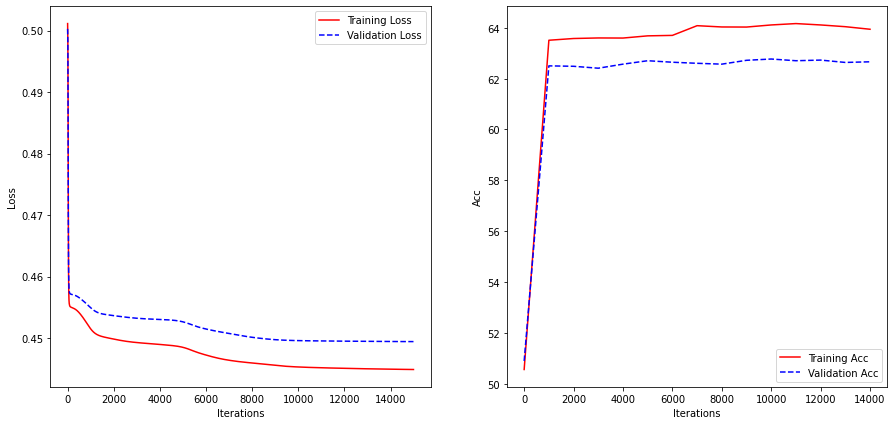

In [36]:
# Plot the training loss & validation loss 
#with plt.style.context('dark_background'):
  fig= plt.figure(figsize=(15,7))

  plt.subplot(1,2,1)
  plt.plot(iters, train_loss, 'r', label="Training Loss")
  plt.plot(iters, val_loss, 'b--', label="Validation Loss")
  plt.xlabel("Iterations")
  plt.ylabel("Loss")
  plt.legend()

  plt.subplot(1,2,2)
  plt.plot(iters2, train_acc, 'r', label="Training Acc")
  plt.plot(iters2, val_acc, 'b--', label="Validation Acc")
  plt.xlabel("Iterations")
  plt.ylabel("Acc")
  plt.legend()

The above given accuracy is for 2 hidden layers.Let's check if the dataset trains well for more hidden layers.

**THIS IS FOR 3 HIDDEN LAYERS.**

In [17]:
np.random.seed(0)

input_nodes = len(reduced_features[0])

# Define Weights
w0 = np.random.random((input_nodes,10))
w1 = np.random.random((10,5))
w2 = np.random.random((5,2))

# Define Iterations
iterations = 15000

# Check Model Hyperparameter
get_model_description([w0,w1,w2])

Weight ip-op	Layer Shape	Layer Params
Layer 0-1	(18, 10)	180
Layer 1-2	(10, 5)	50
Layer 2-3	(5, 2)	10

Total Trainable Params:  240


In [18]:
# Initialising variables to track loss vs iterations so we can plot the changes
train_loss = []
val_loss = []

train_acc = []
val_acc = []

iters = []
iters2 = []

for i in tqdm_notebook(range(iterations)):
  # Train the model
  layer0, layer1, layer2,layer3 = feed_forward(xtrain, w0,w1,w2)
  w0,w1,w2= backpropogate(layer0, layer1, layer2,layer3, ytrain, w0,w1,w2, 0.001)

  # Print Loss, Accuracy & Collect values to plot later
  if i%10==0:
    _, _,_, vpred = feed_forward(xtest, w0,w1,w2)
    tloss = np.mean(np.abs(layer3-ytrain))
    vloss = np.mean(np.abs(vpred-ytest))

    # Append for plotting
    train_loss.append(tloss)
    val_loss.append(vloss)
    iters.append(int(i))

    
    
    # Print Loss
    if i%1000 == 0:
      tacc = get_accuracy(xtrain, ytrain)
      vacc = get_accuracy(xtest, ytest)
      train_acc.append(tacc)
      val_acc.append(vacc)
      iters2.append(i)
      print("Train Loss: %.5f | Valdn Loss: %.5f | Train Acc. %.5f | Test  Acc. %.5f" %(tloss, vloss, tacc, vacc))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # Remove the CWD from sys.path while we load stuff.


Train Loss: 0.50008 | Valdn Loss: 0.49998 | Train Acc. 50.61622 | Test  Acc. 50.74828
Train Loss: 0.45107 | Valdn Loss: 0.45286 | Train Acc. 63.55315 | Test  Acc. 63.65394
Train Loss: 0.44673 | Valdn Loss: 0.44949 | Train Acc. 63.98559 | Test  Acc. 63.58668
Train Loss: 0.44470 | Valdn Loss: 0.44836 | Train Acc. 64.31351 | Test  Acc. 63.49420
Train Loss: 0.44355 | Valdn Loss: 0.44727 | Train Acc. 64.42523 | Test  Acc. 63.51101
Train Loss: 0.44259 | Valdn Loss: 0.44631 | Train Acc. 64.50450 | Test  Acc. 63.37649
Train Loss: 0.44177 | Valdn Loss: 0.44565 | Train Acc. 64.54414 | Test  Acc. 63.42694
Train Loss: 0.44050 | Valdn Loss: 0.44532 | Train Acc. 64.59459 | Test  Acc. 63.33445
Train Loss: 0.43925 | Valdn Loss: 0.44522 | Train Acc. 64.65946 | Test  Acc. 63.19153
Train Loss: 0.43865 | Valdn Loss: 0.44478 | Train Acc. 64.69910 | Test  Acc. 63.29242
Train Loss: 0.43830 | Valdn Loss: 0.44443 | Train Acc. 64.76036 | Test  Acc. 63.26719
Train Loss: 0.43801 | Valdn Loss: 0.44411 | Train Acc.

WE GOT AN ACCURACY OF 65% IN THIS MODEL.

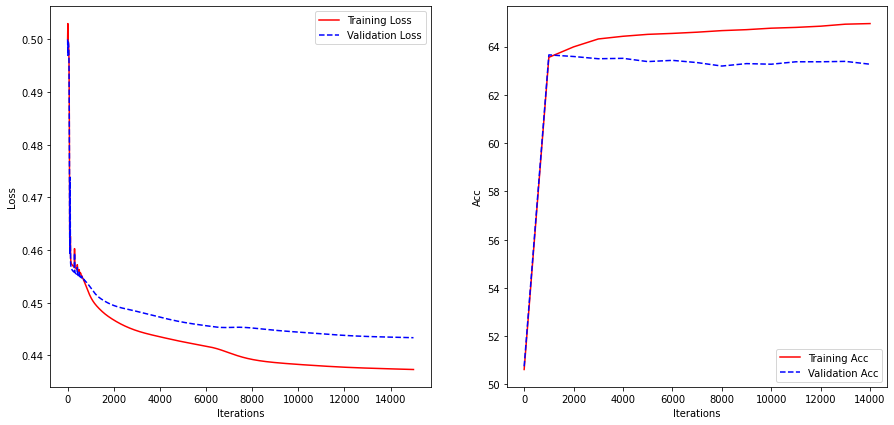

In [19]:
  fig= plt.figure(figsize=(15,7))

  plt.subplot(1,2,1)
  plt.plot(iters, train_loss, 'r', label="Training Loss")
  plt.plot(iters, val_loss, 'b--', label="Validation Loss")
  plt.xlabel("Iterations")
  plt.ylabel("Loss")
  plt.legend()

  plt.subplot(1,2,2)
  plt.plot(iters2, train_acc, 'r', label="Training Acc")
  plt.plot(iters2, val_acc, 'b--', label="Validation Acc")
  plt.xlabel("Iterations")
  plt.ylabel("Acc")
  plt.legend()

The plot for showing Training Loss and Validation Loss **and** Training Accuracy and Validation Accuracy.

# **KERAS**

Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible delay is key to doing good research.

We are using keras to see if this gives a better result.

In [49]:
df.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,0
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,0
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,0
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,0


Name the target as dff

In [0]:
dff=df[' shares']

In [51]:
dff

0        0
1        0
2        1
3        0
4        0
        ..
39639    1
39640    1
39641    1
39642    0
39643    0
Name:  shares, Length: 39644, dtype: int64

In [0]:
selected_labels = df.corr('spearman')[' shares'].sort_values().keys()[:5]

We are only choosing the highly correlated values.

In [53]:
selected_labels

Index([' data_channel_is_world', ' LDA_02', ' data_channel_is_entertainment',
       ' LDA_01', ' rate_negative_words'],
      dtype='object')

In [0]:
selected_features = df[selected_labels].values

In [55]:
selected_features

array([[0.        , 0.04000468, 1.        , 0.37827893, 0.23076923],
       [0.        , 0.05009625, 0.        , 0.05004668, 0.26666667],
       [0.        , 0.03335142, 0.        , 0.03333446, 0.14285714],
       ...,
       [0.        , 0.02520734, 0.        , 0.02502466, 0.42307692],
       [1.        , 0.83998726, 0.        , 0.04000349, 0.53333333],
       [0.        , 0.05000041, 1.        , 0.79933895, 0.16666667]])

In [0]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(selected_features)

In [57]:
len(scaled_features[0])

5

Import tf.keras
tf.keras is TensorFlow's implementation of the Keras API specification. This is a high-level API to build and train models that includes first-class support for TensorFlow-specific functionality, such as eager execution, tf.data pipelines, and Estimators. tf.keras makes TensorFlow easier to use without sacrificing flexibility and performance.

To get started, import tf.keras as part of your TensorFlow program setup:

In [0]:
import tensorflow as tf
from tensorflow import keras

Sequential model
In Keras, you assemble layers to build models. A model is (usually) a graph of layers. The most common type of model is a stack of layers: the tf.keras.Sequential model.Also Set the activation function for the layer. This parameter is specified by the name of a built-in function or as a callable object. By default, no activation is applied.

To build a simple, fully-connected network:

In [0]:
model = tf.keras.Sequential([
              tf.keras.layers.Dense(13, activation='tanh'),
              tf.keras.layers.Dense(2, activation='softmax') # No of nodes here should be equal to no of output classes.
])

The optimizer specifies the training procedure. Pass it optimizer instances from the tf.keras.optimizers module, such as tf.keras.optimizers.Adam or tf.keras.optimizers.SGD. If you just want to use the default parameters, you can also specify optimizers via strings, such as 'adam' or 'sgd'.

In [0]:
#Adam is an adaptive learning rate method, which means, it computes individual learning rates for different parameters.
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

**TRAIN THE DATA**

In [61]:
model.fit(scaled_features, dff, epochs=10, validation_split=0.2, verbose=1)

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

992/992 [==============================] - 1s 1ms/step - loss: 0.6814 - accuracy: 0.5693 - val_loss: 0.6542 - val_accuracy: 0.6293
Epoch 2/10
992/992 [==============================] - 1s 1ms/step - loss: 0.6725 - accuracy: 0.5944 - val_loss: 0.6530 - val_accuracy: 0.6297
Epoch 3/10
992/992 [==============================] - 1s 1ms/step - loss: 0.6724 - accuracy: 0.5950 - val_loss: 0.6483 - val_accuracy: 0.6319
Epoch 4/10
992/992 [==============================] - 1s 1ms/step - loss: 0.6723 -

Keras provides the capability to register callbacks when training a deep learning model.

 It records training metrics for each epoch. This includes the loss and the accuracy as well as the loss and accuracy for the validation dataset, if one is set.

In [0]:
history = model.history.history

In [65]:
history

{'accuracy': [0.569288969039917,
  0.5944190621376038,
  0.5949550867080688,
  0.5941352844238281,
  0.5946082472801208,
  0.5942298769950867,
  0.594292938709259,
  0.5947659015655518,
  0.5949550867080688,
  0.5949235558509827],
 'loss': [0.6813598871231079,
  0.6724597215652466,
  0.6723901629447937,
  0.6722567677497864,
  0.672100841999054,
  0.6721969246864319,
  0.6720864176750183,
  0.6719546318054199,
  0.6719600558280945,
  0.6720609664916992],
 'val_accuracy': [0.629335343837738,
  0.6297137141227722,
  0.6318577527999878,
  0.6305965185165405,
  0.6304704546928406,
  0.6302182078361511,
  0.6304704546928406,
  0.6297137141227722,
  0.6303443312644958,
  0.6300920844078064],
 'val_loss': [0.6541638374328613,
  0.6530017256736755,
  0.6482772827148438,
  0.6503365635871887,
  0.6503897905349731,
  0.6526809930801392,
  0.6535276174545288,
  0.6543037295341492,
  0.6530750393867493,
  0.6510117650032043]}

We got an accuracy of 65% using Keras.

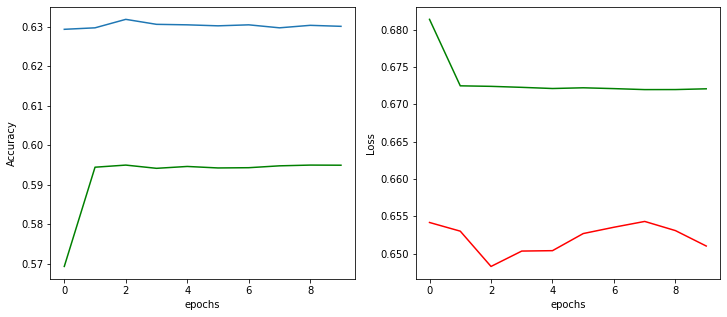

In [63]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.plot(model.history.epoch, history['accuracy'], 'g',
         model.history.epoch, history['val_accuracy'], )

plt.subplot(1,2,2)
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.plot(model.history.epoch, history['loss'], 'g',
         model.history.epoch, history['val_loss'], 'r')

The line plot shows how accuracy and validation_accuracy **and** loss and validation_loss are deviating according to the epochs.